In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as n

In [2]:
data = pd.read_csv('my_PJME_MW.csv',index_col=[0], parse_dates=[0])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145374 entries, 2002-01-01 to 2018-08-03
Data columns (total 13 columns):
Time               145374 non-null object
PJME_MW            145374 non-null float64
year               145374 non-null int64
month              145374 non-null int64
dayofmonth         145374 non-null int64
quarter            145374 non-null int64
dayofyear          145374 non-null int64
weekofyear         145374 non-null int64
dayofweek          145374 non-null int64
hour               145374 non-null int64
is_holiday         145374 non-null int64
is_prev_holiday    145374 non-null int64
is_next_holiday    145374 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 15.5+ MB


In [4]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


/Users/admin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'МВт')

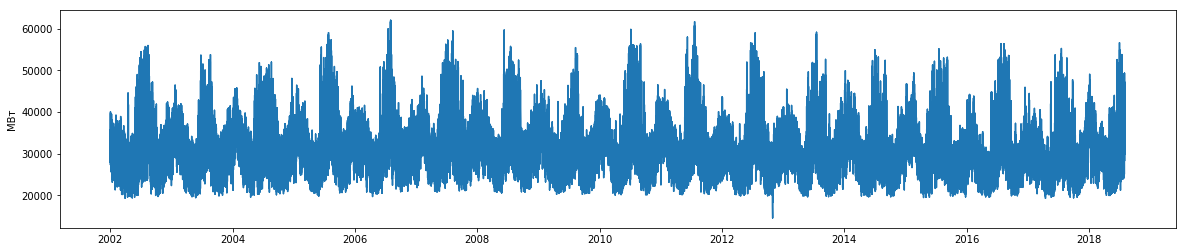

In [5]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'])
plt.ylabel ( 'МВт' )

In [6]:
data_monthly = data.resample('M').mean()

Text(0, 0.5, 'МВт')

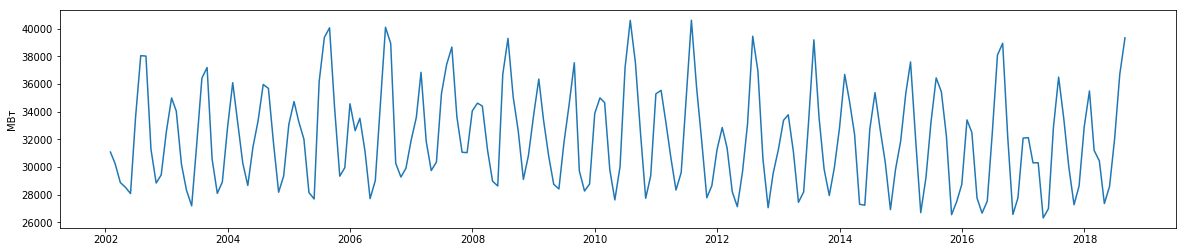

In [7]:
plt.figure(figsize =(20,4))
plt.plot(data_monthly.index, data_monthly.PJME_MW)
plt.ylabel ( 'МВт' )

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [9]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))]

In [10]:
import warnings
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_monthly['PJME_MW'].values[:-10],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('SARIMAX{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            

SARIMAX(0, 0, 0)x(0, 0, 0, 6)3 - AIC:4463.051035665778
SARIMAX(0, 0, 0)x(0, 0, 1, 6)3 - AIC:4201.916959936761
SARIMAX(0, 0, 0)x(0, 0, 2, 6)3 - AIC:4032.8632314963497
SARIMAX(0, 0, 0)x(0, 1, 0, 6)3 - AIC:3434.0624743755684
SARIMAX(0, 0, 0)x(0, 1, 1, 6)3 - AIC:3243.4896376617044
SARIMAX(0, 0, 0)x(0, 1, 2, 6)3 - AIC:3083.591272916363
SARIMAX(0, 0, 0)x(0, 2, 0, 6)3 - AIC:3544.037003147462
SARIMAX(0, 0, 0)x(0, 2, 1, 6)3 - AIC:3303.2253166338314
SARIMAX(0, 0, 0)x(0, 2, 2, 6)3 - AIC:3152.0426087765
SARIMAX(0, 0, 0)x(1, 0, 0, 6)3 - AIC:3459.502526756797
SARIMAX(0, 0, 0)x(1, 0, 1, 6)3 - AIC:3428.5041216521313
SARIMAX(0, 0, 0)x(1, 0, 2, 6)3 - AIC:3211.154137623531
SARIMAX(0, 0, 0)x(1, 1, 0, 6)3 - AIC:3183.9564240833306
SARIMAX(0, 0, 0)x(1, 1, 1, 6)3 - AIC:3166.2553564535874
SARIMAX(0, 0, 0)x(1, 1, 2, 6)3 - AIC:3055.922360993225
SARIMAX(0, 0, 0)x(1, 2, 0, 6)3 - AIC:3216.699028827576
SARIMAX(0, 0, 0)x(1, 2, 1, 6)3 - AIC:3188.9882847616964
SARIMAX(0, 0, 0)x(1, 2, 2, 6)3 - AIC:3045.183508247357
SARI

SARIMAX(0, 1, 2)x(1, 1, 1, 6)3 - AIC:3107.503612965862
SARIMAX(0, 1, 2)x(1, 1, 2, 6)3 - AIC:2971.0828970544835
SARIMAX(0, 1, 2)x(1, 2, 0, 6)3 - AIC:3202.1313530637008
SARIMAX(0, 1, 2)x(1, 2, 1, 6)3 - AIC:3051.5134081373517
SARIMAX(0, 1, 2)x(1, 2, 2, 6)3 - AIC:2932.2347013949293
SARIMAX(0, 1, 2)x(2, 0, 0, 6)3 - AIC:3169.227910136374
SARIMAX(0, 1, 2)x(2, 0, 1, 6)3 - AIC:3144.9568971689364
SARIMAX(0, 1, 2)x(2, 0, 2, 6)3 - AIC:3073.6424344925526
SARIMAX(0, 1, 2)x(2, 1, 0, 6)3 - AIC:3057.2245237925854
SARIMAX(0, 1, 2)x(2, 1, 1, 6)3 - AIC:3028.3137544987176
SARIMAX(0, 1, 2)x(2, 1, 2, 6)3 - AIC:2972.541964506271
SARIMAX(0, 1, 2)x(2, 2, 0, 6)3 - AIC:3060.095214270788
SARIMAX(0, 1, 2)x(2, 2, 1, 6)3 - AIC:2997.516210107105
SARIMAX(0, 1, 2)x(2, 2, 2, 6)3 - AIC:3024.783353627163
SARIMAX(0, 2, 0)x(0, 0, 0, 6)3 - AIC:3639.572208659106
SARIMAX(0, 2, 0)x(0, 0, 1, 6)3 - AIC:3492.0355722956447
SARIMAX(0, 2, 0)x(0, 0, 2, 6)3 - AIC:3341.1647876919783
SARIMAX(0, 2, 0)x(0, 1, 0, 6)3 - AIC:3494.181581263125


SARIMAX(1, 0, 1)x(2, 2, 2, 6)3 - AIC:3077.919607888452
SARIMAX(1, 0, 2)x(0, 0, 0, 6)3 - AIC:3506.261756116568
SARIMAX(1, 0, 2)x(0, 0, 1, 6)3 - AIC:3368.468878915949
SARIMAX(1, 0, 2)x(0, 0, 2, 6)3 - AIC:3232.8133955150897
SARIMAX(1, 0, 2)x(0, 1, 0, 6)3 - AIC:3310.3847929199123
SARIMAX(1, 0, 2)x(0, 1, 1, 6)3 - AIC:3129.1664319797765
SARIMAX(1, 0, 2)x(0, 1, 2, 6)3 - AIC:2987.2824878403317
SARIMAX(1, 0, 2)x(0, 2, 0, 6)3 - AIC:3397.5629780721138
SARIMAX(1, 0, 2)x(0, 2, 1, 6)3 - AIC:3171.859656338456
SARIMAX(1, 0, 2)x(0, 2, 2, 6)3 - AIC:3026.0429163158074
SARIMAX(1, 0, 2)x(1, 0, 0, 6)3 - AIC:3397.6804024312946
SARIMAX(1, 0, 2)x(1, 0, 1, 6)3 - AIC:3339.309332406666
SARIMAX(1, 0, 2)x(1, 0, 2, 6)3 - AIC:3216.194709732265
SARIMAX(1, 0, 2)x(1, 1, 0, 6)3 - AIC:3144.1461003973263
SARIMAX(1, 0, 2)x(1, 1, 1, 6)3 - AIC:3100.1782098814124
SARIMAX(1, 0, 2)x(1, 1, 2, 6)3 - AIC:3004.3837580534932
SARIMAX(1, 0, 2)x(1, 2, 0, 6)3 - AIC:3165.342093676915
SARIMAX(1, 0, 2)x(1, 2, 1, 6)3 - AIC:3042.4361775085454

SARIMAX(1, 2, 1)x(1, 1, 0, 6)3 - AIC:3200.079905937617
SARIMAX(1, 2, 1)x(1, 1, 1, 6)3 - AIC:3172.756820699022
SARIMAX(1, 2, 1)x(1, 1, 2, 6)3 - AIC:3024.097284038613
SARIMAX(1, 2, 1)x(1, 2, 0, 6)3 - AIC:3260.9239916884953
SARIMAX(1, 2, 1)x(1, 2, 1, 6)3 - AIC:3108.9551305937275
SARIMAX(1, 2, 1)x(1, 2, 2, 6)3 - AIC:2996.7400524091763
SARIMAX(1, 2, 1)x(2, 0, 0, 6)3 - AIC:3179.9507385021307
SARIMAX(1, 2, 1)x(2, 0, 1, 6)3 - AIC:3257.035881084732
SARIMAX(1, 2, 1)x(2, 0, 2, 6)3 - AIC:3238.2476223169815
SARIMAX(1, 2, 1)x(2, 1, 0, 6)3 - AIC:3098.9886086297047
SARIMAX(1, 2, 1)x(2, 1, 1, 6)3 - AIC:3041.8529140629
SARIMAX(1, 2, 1)x(2, 1, 2, 6)3 - AIC:3023.6709354203463
SARIMAX(1, 2, 1)x(2, 2, 0, 6)3 - AIC:3064.8248803553424
SARIMAX(1, 2, 1)x(2, 2, 1, 6)3 - AIC:3010.6018786097247
SARIMAX(1, 2, 1)x(2, 2, 2, 6)3 - AIC:2993.181005925716
SARIMAX(1, 2, 2)x(0, 0, 0, 6)3 - AIC:3558.317171682107
SARIMAX(1, 2, 2)x(0, 0, 1, 6)3 - AIC:3369.0089613846976
SARIMAX(1, 2, 2)x(0, 0, 2, 6)3 - AIC:3216.478636985318
SA

SARIMAX(2, 1, 0)x(2, 2, 1, 6)3 - AIC:2950.9419816800446
SARIMAX(2, 1, 0)x(2, 2, 2, 6)3 - AIC:3065.3008309587685
SARIMAX(2, 1, 1)x(0, 0, 0, 6)3 - AIC:3382.832135173765
SARIMAX(2, 1, 1)x(0, 0, 1, 6)3 - AIC:3270.8645085916705
SARIMAX(2, 1, 1)x(0, 0, 2, 6)3 - AIC:3152.988099236355
SARIMAX(2, 1, 1)x(0, 1, 0, 6)3 - AIC:3348.8240698272916
SARIMAX(2, 1, 1)x(0, 1, 1, 6)3 - AIC:3145.5031743234204
SARIMAX(2, 1, 1)x(0, 1, 2, 6)3 - AIC:2995.7312780969824
SARIMAX(2, 1, 1)x(0, 2, 0, 6)3 - AIC:3444.916505612847
SARIMAX(2, 1, 1)x(0, 2, 1, 6)3 - AIC:3160.2308398659998
SARIMAX(2, 1, 1)x(0, 2, 2, 6)3 - AIC:2941.7883085928806
SARIMAX(2, 1, 1)x(1, 0, 0, 6)3 - AIC:3270.7855335440036
SARIMAX(2, 1, 1)x(1, 0, 1, 6)3 - AIC:3248.2624920510425
SARIMAX(2, 1, 1)x(1, 0, 2, 6)3 - AIC:3102.9682033142144
SARIMAX(2, 1, 1)x(1, 1, 0, 6)3 - AIC:3133.973148414151
SARIMAX(2, 1, 1)x(1, 1, 1, 6)3 - AIC:3126.95026134759
SARIMAX(2, 1, 1)x(1, 1, 2, 6)3 - AIC:2987.6115920157936
SARIMAX(2, 1, 1)x(1, 2, 0, 6)3 - AIC:3163.571356929572

## Наилучшие параметры с точки зрения AIC: SARIMAX(2, 2, 2)x(1, 2, 2, 6)3 - AIC:2955.760490269216


In [11]:
warnings.filterwarnings("ignore")

mod = sm.tsa.statespace.SARIMAX(data_monthly['PJME_MW'].values[:-3],order=[2,2,2],
                                seasonal_order=[1,2,2,6] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 3103.5371627850254


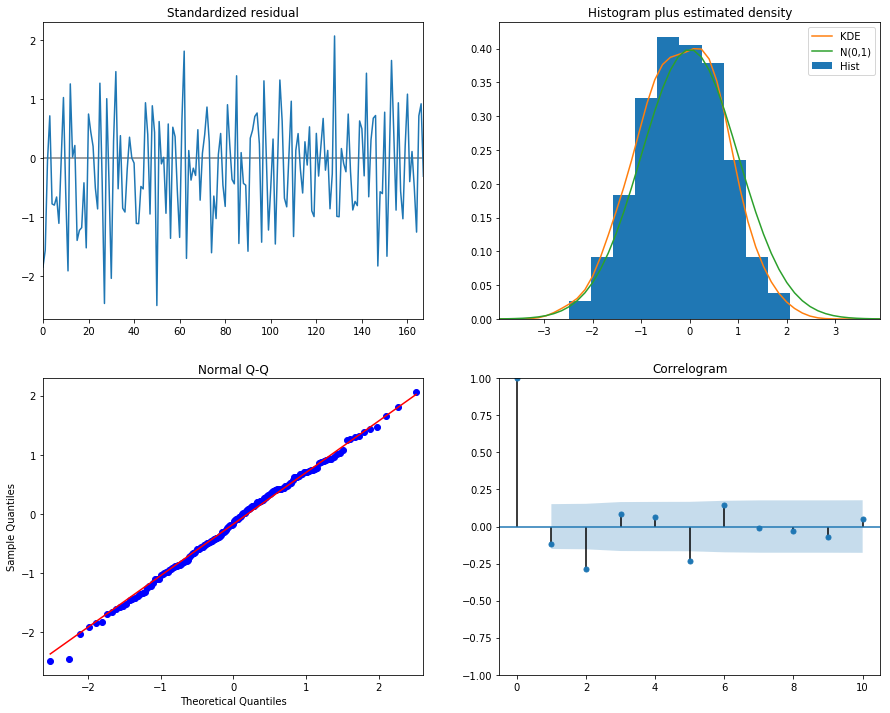

In [12]:
results_opt.plot_diagnostics(figsize=(15, 12))
plt.show()

## Все выглядит неплохо за исключением коррелограммы - остатки рядов на 2 и 5 месяц имеют повышенную корреляцию

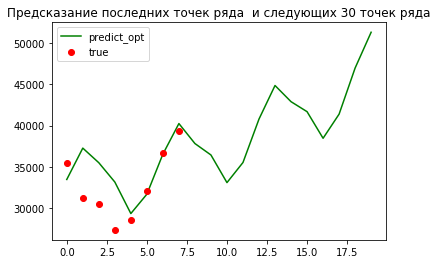

In [35]:
pred_dynamic_opt = results_opt.forecast(20)

plt.plot(pred_dynamic_opt,'g', label='predict_opt')

plt.plot(data_monthly['PJME_MW'].values[-8:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

# Ожидаемо модель, построенная на месячных данных показывает худшую точность по сравнению с недельной. Особенно заметен ложный тренд на повышение показателей с течением времени.